Este proyecto tiene el objetivo de pronosticar el valor del clp/usd en la ventana de las próximas 4 semanas

Para esto es necesario:

    - Realizar un scraping de alguna página financiera

    - Aplicar modelo de Forecast
    
    - Gráficar y subir

In [1]:
#%pip install html5lib
#%pip install matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
años = [i for i in range(1990,2024)]
map_fechas = {"Ene":"01",
              "Feb":"02",
              "Mar":"03",
              "Abr":"04",
              "May":"05",
              "Jun":"06",
              "Jul":"07",
              "Ago":"08",
              "Sep":"09",
              "Oct":"10",
              "Nov":"11",
              "Dic":"12"}



In [4]:
data = []
for año in años:
    html = f"https://si3.bcentral.cl/Siete/ES/Siete/Cuadro/CAP_TIPO_CAMBIO/MN_TIPO_CAMBIO4/DOLAR_OBS_ADO?cbFechaDiaria={año}&cbFrecuencia=DAILY&cbCalculo=NONE&cbFechaBase="
    r = pd.read_html(html,attrs={"id":"grilla"},index_col=0)
    fechas= list(r[0].columns.values)

    valor = list(map(list, zip(*r[0].values)))
    fechas = [i.replace('.','-') for i in fechas]
    valor = [str(i[0]).replace('.','') for i in valor]
    valor = [i.replace(',','') for i in valor]

    fechas2 = [i[:3]+map_fechas[i[3:6]]+i[6:] for i in fechas[1:]]
    valores2 = [str(i)[:-2]+'.'+str(i)[-2:] for i in valor[1:]]

    df = pd.DataFrame({fechas[0]:fechas2,valor[0]:valores2})
    data.append(df)

In [5]:
all_df = pd.concat(data)

all_df['Dólar observado'] =all_df['Dólar observado'].astype(float)
all_df['Serie'] = pd.to_datetime(all_df['Serie'],format="%d-%m-%Y")

all_df.to_csv('./valor_clp-usd_0508.csv', index=False)

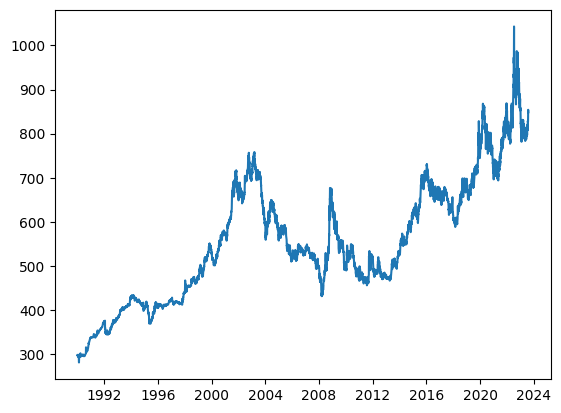

In [6]:
# Plot de los datos

x = all_df['Serie']
y = all_df['Dólar observado']

fig, ax = plt.subplots()

ax.plot(x,y) 

In [7]:
# Análisis expliratorio

max = all_df['Dólar observado'].max()
min = all_df['Dólar observado'].min()
len = all_df['Dólar observado'].count()

print(f'max = {str(max)} | min = {str(min)} | len = {str(len)}')

max = 1042.97 | min = 280.88 | len = 8381


In [8]:
en_semana = pd.DataFrame(all_df)
en_semana = en_semana.set_index('Serie')
resultados = en_semana.resample('W').mean()